In [1]:
from google.colab import files
files.upload()
!ls

Saving data.csv to data.csv
data.csv  datalab


In [2]:
import pandas as pd
data_audios = pd.read_csv("data.csv")
data_audios.head()

,file_name,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,talking
0,Blade_runner_2049_4806.wav,10.128521,-2.310414,14.228136,-4.035911,-3.217767,5.899802,-0.513385,4.201199,3.523540,8.326513,9.293122,2.824958,2.811544,True
1,Blade_runner_2049_9467.wav,14.813178,25.207005,7.759559,-4.807255,-11.883262,0.515646,4.323070,12.207666,15.090763,10.461845,2.767537,5.542583,10.196745,True
2,Blade_runner_2049_5988.wav,15.147254,6.833425,-17.200629,5.543003,3.258101,22.544019,-9.052845,-14.140013,-11.734133,3.206699,-1.158664,-12.767592,-20.805162,True
3,Blade_runner_2049_1015.wav,17.764756,20.048581,-23.437814,24.481688,-3.452229,5.373132,-11.407465,-9.194414,-31.339095,-3.098906,0.501264,5.508773,-1.227779,True
4,Blade_runner_2049_5206.wav,12.667226,-11.331913,10.287428,15.271037,8.014449,9.792789,13.640510,13.274845,4.976345,6.036882,2.777041,1.204977,1.563163,True


In [0]:
x = data_audios.iloc[:,1:-1]
y = data_audios.iloc[:,-1]


In [12]:
count = 0
for index, row in enumerate(y):
  if not row:
    count += 1
print(count)

1000


In [4]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
x_pca2 = pca2.fit_transform(x)

In [5]:

talking = []
not_talking = []

for index, row in enumerate(y):
  if row:
    talking.append(x_pca2[index])
  else:
    not_talking.append(x_pca2[index])

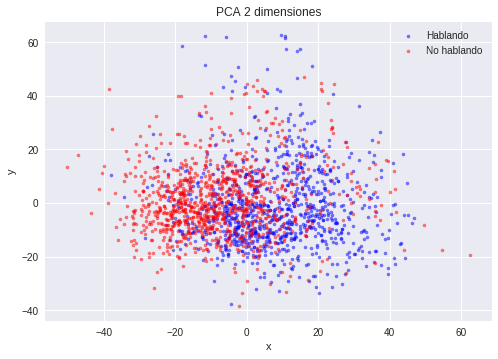

In [6]:
import matplotlib.pyplot as plt
import numpy as np

not_talking = np.array(not_talking)
talking = np.array(talking)
plt.scatter(talking[:,0], talking[:,1], c='blue', label='Hablando', s=10, alpha=0.5)
plt.scatter(not_talking[:,0], not_talking[:,1], c='red', label='No hablando', s=10, alpha=0.5)

# plt.scatter(x_pca2[:,0], x_pca2[:,1], c=y, cmap="winter")
plt.title('PCA 2 dimensiones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

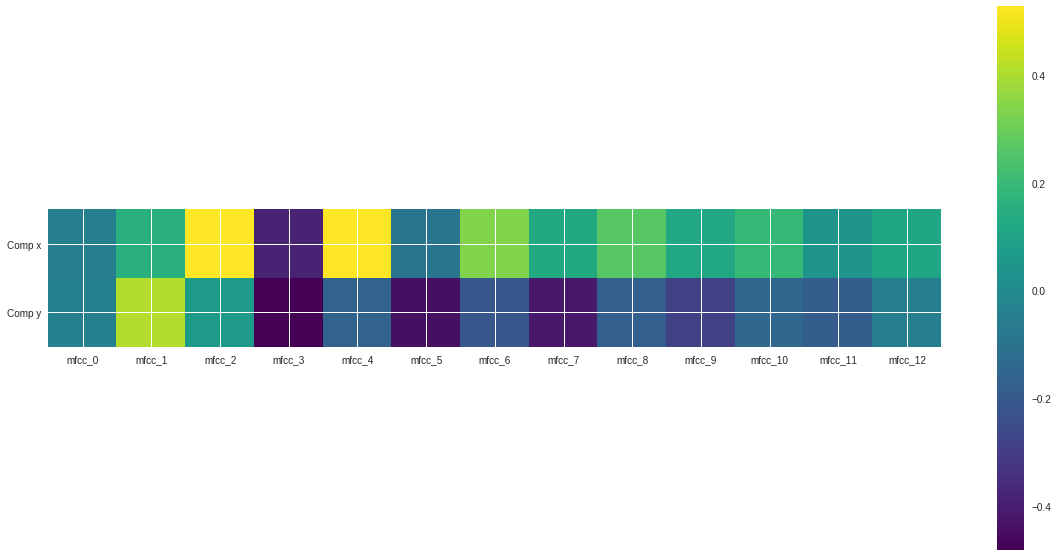

In [8]:
lbls = x.columns
plt.figure(figsize=(20,10))
plt.imshow(pca2.components_, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(lbls)), lbls)
plt.yticks(np.arange(2), ["Comp x", "Comp y"])
plt.colorbar()
plt.show()

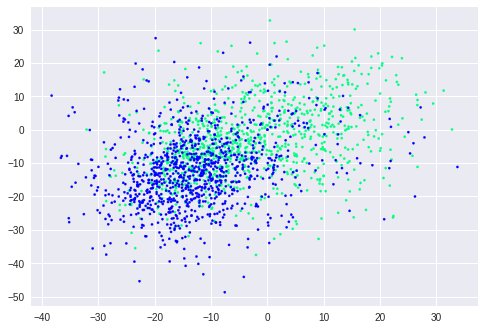

In [9]:
plt.scatter(x['mfcc_2'], x['mfcc_4'], c=y, cmap="winter", s=5)

Conteo apariciones v/s potencia mfcc_2

1000


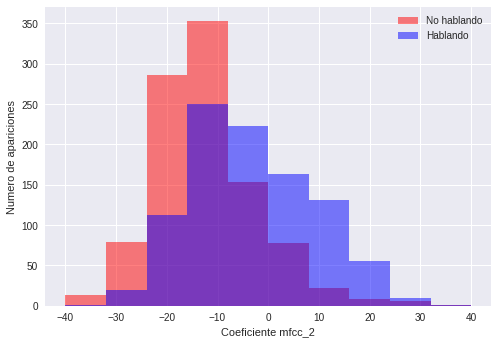

In [10]:
import numpy as np

bins = 8

# bins_array = np.linspace(-40,40,bins + 1)
# talk = []
# no_talk = []

# for index, row in enumerate(x):
#   if y[index]:
#     talk.append(row['mfcc_2'])
#   else:
#     no_talk.append(row)
talk = data_audios['talking'] == True
no_talk = data_audios['talking'] == False
talking = data_audios[talk]
not_talking = data_audios[no_talk]
print(len(not_talking))
plt.hist(not_talking['mfcc_2'], range=(-40,40),alpha=0.5, color="red", label='No hablando')
plt.hist(talking['mfcc_2'], range=(-40,40), alpha=0.5, color="blue", label='Hablando')
plt.xlabel("Coeficiente mfcc_2")
plt.ylabel("Numero de apariciones")
plt.title("")
plt.legend()
  

1000


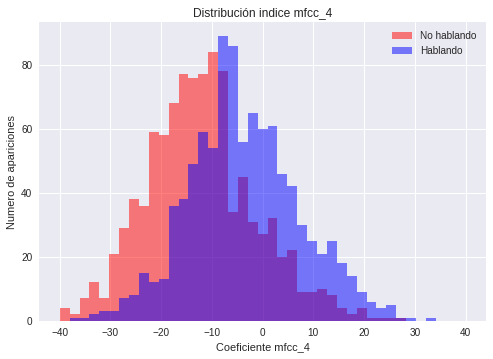

In [35]:
num_bins = 20
talk = data_audios['talking'] == True
no_talk = data_audios['talking'] == False
talking = data_audios[talk]
not_talking = data_audios[no_talk]
print(len(not_talking))
mfcc_coef = 'mfcc_4'
plt.hist(not_talking[mfcc_coef], range=(-40,40),alpha=0.5, color="red", label='No hablando', bins= 41)
plt.hist(talking[mfcc_coef], range=(-40,40), alpha=0.5, color="blue", label='Hablando', bins= 41)
plt.xlabel("Coeficiente "+ mfcc_coef)
plt.ylabel("Numero de apariciones")
plt.title("Distribución indice " + mfcc_coef)
plt.legend()

Conteo apariciones v/s potencia mfcc_4


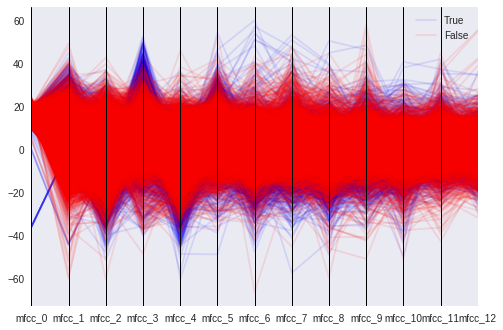

In [6]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data_audios, class_column='talking', cols=['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11','mfcc_12'  ], alpha=0.1, color=['b','r'])

Parallel coordinates

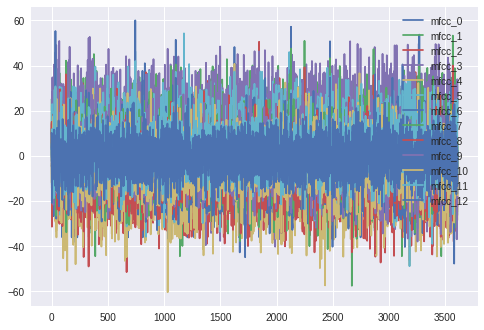

In [9]:
talk = data_audios['talking'] == True
no_talk = data_audios['talking'] == False
talking = data_audios[talk]
not_talking = data_audios[no_talk]

talking.plot()

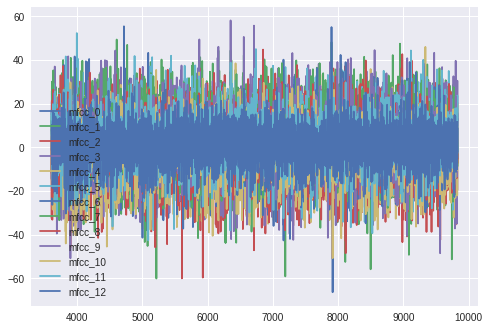

In [10]:
talk = data_audios['talking'] == True
no_talk = data_audios['talking'] == False
talking = data_audios[talk]
not_talking = data_audios[no_talk]

not_talking.plot()

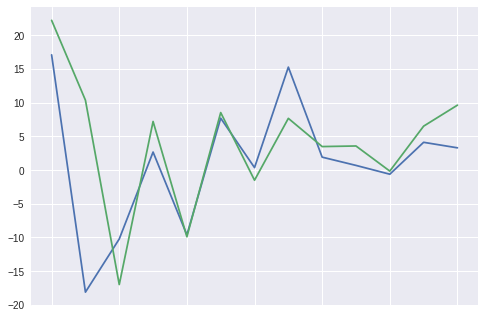

In [104]:
talking = data_audios.iloc[0, 1: -1]

not_talking = data_audios.iloc[1000, 1: -1]

talking.plot()

not_talking.plot()


In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
x_pca = pca.fit_transform(x)

In [112]:
import itertools
import numpy as np


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

classifier = SVC(gamma=0.002, C=0.9)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33)

In [113]:
from sklearn.metrics import accuracy_score

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7904468412942989


In [114]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[248  72]
 [ 50 279]]


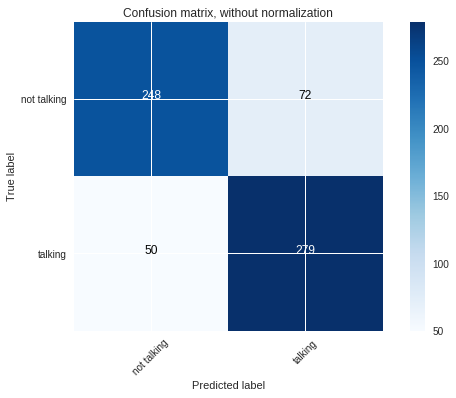

In [93]:
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not talking','talking'],
                      title='Confusion matrix, without normalization')

In [119]:
# misclassified_samples = x_test[y_test != y_pred]
# missed_files = pd.DataFrame()
# count = 0
# print(misclassified_samples)
# for index, row in misclassified_samples.iterrows():
#   #if row['mfcc_1'] == data_audios.loc[[row.name]]['mfcc_1']:
#     #print("asdf")
#   missed_files = missed_files.append(data_audios.loc[[index]])
# print(len(missed_files))
# data_frame = pd.DataFrame(missed_files)
# data_frame.to_csv('misclassified_samples.csv')
# files.download('misclassified_samples.csv')